In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
#dataset = loadtxt('pima-indians-diabetes-data.csv',delimiter=',')
df=pd.read_csv('pima-indians-diabetes-data.csv',sep=',')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
headers=['times_pregnant','plasma_glucose_conc','diastolic_bp',
        'triceps_skin_fold_thickness','insulin','bmi',
        'diabetes_pedigree_function','age','target']
df.columns=headers
df.head()

,times_pregnant,plasma_glucose_conc,diastolic_bp,triceps_skin_fold_thickness,insulin,bmi,diabetes_pedigree_function,age,target
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
df.isnull().sum()

times_pregnant                 0
plasma_glucose_conc            0
diastolic_bp                   0
triceps_skin_fold_thickness    0
insulin                        0
bmi                            0
diabetes_pedigree_function     0
age                            0
target                         0
dtype: int64

In [9]:
X=np.asarray(df[['times_pregnant','plasma_glucose_conc','diastolic_bp',
        'triceps_skin_fold_thickness','insulin','bmi',
        'diabetes_pedigree_function','age']])
y=np.asarray(df['target'])

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.84372629, -1.12208597, -0.16024856,  0.53202348, -0.69355921,
        -0.68372895, -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, -1.28688187, -0.69355921,
        -1.10230105,  0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856,  0.15569823,  0.12235685,
        -0.49346891, -0.91968415, -1.0403932 ],
       [-1.14057861,  0.50506924, -1.50353429,  0.90834872,  0.76467376,
         1.40913155,  5.48273197, -0.01864981],
       [ 0.343683  , -0.15205113,  0.25307013, -1.28688187, -0.69355921,
        -0.81056898, -0.8170523 , -0.27408566]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (460, 8) (460,)
Test set: (307, 8) (307,)


In [12]:
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=200,batch_size=10)

Epoch 1/200
460/460 [==============================] - 2s 5ms/step - loss: 0.6968 - accuracy: 0.5065
Epoch 2/200
460/460 [==============================] - 0s 301us/step - loss: 0.6738 - accuracy: 0.6500
Epoch 3/200
460/460 [==============================] - 0s 302us/step - loss: 0.6560 - accuracy: 0.7022
Epoch 4/200
460/460 [==============================] - 0s 322us/step - loss: 0.6380 - accuracy: 0.7130
Epoch 5/200
460/460 [==============================] - 0s 305us/step - loss: 0.6197 - accuracy: 0.7152
Epoch 6/200
460/460 [==============================] - 0s 299us/step - loss: 0.5990 - accuracy: 0.7370
Epoch 7/200
460/460 [==============================] - 0s 314us/step - loss: 0.5779 - accuracy: 0.7435
Epoch 8/200
460/460 [==============================] - 0s 316us/step - loss: 0.5554 - accuracy: 0.7413
Epoch 9/200
460/460 [==============================] - 0s 439us/step - loss: 0.5335 - accuracy: 0.7413
Epoch 10/200
460/460 [==============================] - 0s 288us/step - los

460/460 [==============================] - 0s 433us/step - loss: 0.3732 - accuracy: 0.8326
Epoch 80/200
460/460 [==============================] - 0s 545us/step - loss: 0.3756 - accuracy: 0.8283
Epoch 81/200
460/460 [==============================] - 0s 543us/step - loss: 0.3758 - accuracy: 0.8304
Epoch 82/200
460/460 [==============================] - 0s 490us/step - loss: 0.3724 - accuracy: 0.8283
Epoch 83/200
460/460 [==============================] - 0s 503us/step - loss: 0.3720 - accuracy: 0.8304
Epoch 84/200
460/460 [==============================] - 0s 508us/step - loss: 0.3703 - accuracy: 0.8239
Epoch 85/200
460/460 [==============================] - 0s 510us/step - loss: 0.3697 - accuracy: 0.8304
Epoch 86/200
460/460 [==============================] - 0s 448us/step - loss: 0.3677 - accuracy: 0.8326
Epoch 87/200
460/460 [==============================] - 0s 452us/step - loss: 0.3681 - accuracy: 0.8304
Epoch 88/200
460/460 [==============================] - 0s 524us/step - loss:

460/460 [==============================] - 0s 324us/step - loss: 0.3030 - accuracy: 0.8739
Epoch 158/200
460/460 [==============================] - 0s 299us/step - loss: 0.3052 - accuracy: 0.8696
Epoch 159/200
460/460 [==============================] - 0s 292us/step - loss: 0.3021 - accuracy: 0.8761
Epoch 160/200
460/460 [==============================] - 0s 302us/step - loss: 0.3004 - accuracy: 0.8674
Epoch 161/200
460/460 [==============================] - 0s 343us/step - loss: 0.3030 - accuracy: 0.8717
Epoch 162/200
460/460 [==============================] - 0s 371us/step - loss: 0.2991 - accuracy: 0.8739
Epoch 163/200
460/460 [==============================] - 0s 412us/step - loss: 0.2988 - accuracy: 0.8739
Epoch 164/200
460/460 [==============================] - 0s 453us/step - loss: 0.2964 - accuracy: 0.8739
Epoch 165/200
460/460 [==============================] - 0s 506us/step - loss: 0.2955 - accuracy: 0.8761
Epoch 166/200
460/460 [==============================] - 0s 505us/ste

In [16]:
loss_of_model_on_dataset,accuracy= model.evaluate(X_train,y_train)
print('Accuracy: %.2f'%(accuracy*100))

460/460 [==============================] - 0s 315us/step
Accuracy: 90.00


In [17]:
print(loss_of_model_on_dataset)

0.24759625015051467


In [19]:
predictions=model.predict_classes(X_test)
predictions[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [20]:
#EVALUATION

In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,predictions)

D:\Softwares\Anaconda_numpy\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7915309446254072

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, predictions, labels=[1,0]))

[[ 73  32]
 [ 32 170]]


Confusion matrix, without normalization
[[ 73  32]
 [ 32 170]]


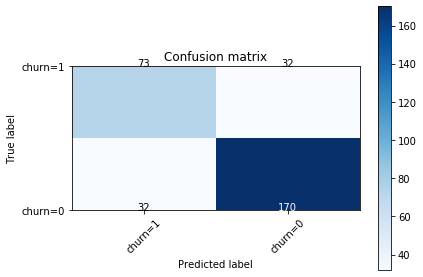

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [25]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       202
           1       0.70      0.70      0.70       105

    accuracy                           0.79       307
   macro avg       0.77      0.77      0.77       307
weighted avg       0.79      0.79      0.79       307



In [26]:
from sklearn.metrics import log_loss
predictions_prob = model.predict_proba(X_test)
log_loss(y_test, predictions_prob)

0.6502232836492527

In [31]:
for i in range(8):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[0.6405353265637751, -0.7152971682859277, -0.573567244000577, 0.7829069725890075, 0.9556328374764441, 0.25488727331523364, -0.12579662422835297, 0.8328030107997808] => 0 (expected 0)
[-0.8437262911837038, 1.1308981637418536, 0.1497404560673259, 0.030256484213278943, 0.7646737580915557, -0.8105689808308659, -1.0525018335396417, -0.7849573566202676] => 0 (expected 0)
[-0.546873967634208, -0.4023827052303715, -0.2635782296857615, -1.2868818704442462, -0.6935592117566833, -0.15100082350232807, -0.9468514025106674, -1.0403932041076436] => 0 (expected 0)
[1.2342399736627667, -0.43367415153592714, 0.5630591418204133, -1.2868818704442462, -0.6935592117566833, -0.937409011086354, 1.1601200505814484, 0.06649546833765263] => 1 (expected 0)
[0.6405353265637751, -0.21463402739703785, -3.5701277157104605, -1.2868818704442462, -0.6935592117566833, -4.05767375537136, -0.8532753064564332, -0.6146667916286835] => 0 (expected 0)
[0.34368300301427934, -0.3085083663137047, 0.1497404560673259, 0.46930260243

In [32]:
from joblib import dump
dump(model, filename="diabetes_prediction.joblib")

['diabetes_prediction.joblib']